# **TELECOM CUSTOMER CHURN ANALYSIS (DESCRIPTIVE / PATTERN ANALYSIS)**




In [ ]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------
#  Load dataset
# ---------------------------------------
df = pd.read_csv("/content/telecom_churn.csv")
print("Shape:", df.shape)
display(df.head())

Shape: (243553, 12)


customer_id telecom_partner gender  age              state  \
0            1    Reliance Jio      F   25          Karnataka   
1            2    Reliance Jio      F   55            Mizoram   
2            3        Vodafone      F   57  Arunachal Pradesh   
3            4            BSNL      M   46         Tamil Nadu   
4            5            BSNL      F   26            Tripura   

  date_of_registration  num_dependents  estimated_salary  calls_made  \
0           01-01-2020               4            124962          44   
1           01-01-2020               2            130556          62   
2           01-01-2020               0            148828          49   
3           01-01-2020               1             38722          80   
4           01-01-2020               2             55098          78   

   sms_sent  data_used  churn  
0        45       -361      0  
1        39       5973      0  
2        24        193      1  
3        25       9377      1  
4        15       1393      0

In [ ]:
# ---------------------------------------
#  Basic info
# ---------------------------------------
print("\n--- DataFrame Info ---")
display(df.info())

print("\n--- Numerical Summary ---")
display(df.describe().T)

# ---------------------------------------
#  Missing values
# ---------------------------------------
missing = df.isnull().sum().rename("missing_count")
missing_pct = (df.isnull().mean() * 100).rename("missing_pct")
missing_df = pd.concat([missing, missing_pct], axis=1).sort_values("missing_pct", ascending=False)
print("\n--- Missing Values ---")
display(missing_df.head(10))


--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   date_of_registration  243553 non-null  object
 6   num_dependents        243553 non-null  int64 
 7   estimated_salary      243553 non-null  int64 
 8   calls_made            243553 non-null  int64 
 9   sms_sent              243553 non-null  int64 
 10  data_used             243553 non-null  int64 
 11  churn                 243553 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 22.3+ MB


None


--- Numerical Summary ---


count           mean           std      min      25%  \
customer_id       243553.0  121777.000000  70307.839393      1.0  60889.0   
age               243553.0      46.077609     16.444029     18.0     32.0   
num_dependents    243553.0       1.997500      1.414941      0.0      1.0   
estimated_salary  243553.0   85021.137839  37508.963233  20000.0  52585.0   
calls_made        243553.0      49.010548     29.453556    -10.0     24.0   
sms_sent          243553.0      23.945404     14.733575     -5.0     11.0   
data_used         243553.0    4993.186025   2942.019547   -987.0   2490.0   
churn             243553.0       0.200478      0.400359      0.0      0.0   

                       50%       75%       max  
customer_id       121777.0  182665.0  243553.0  
age                   46.0      60.0      74.0  
num_dependents         2.0       3.0       4.0  
estimated_salary   84990.0  117488.0  149999.0  
calls_made            49.0      74.0     108.0  
sms_sent              24.0      36.0      53.0  
data_used           4987.0    7493.0   10991.0  
churn                  0.0       0.0       1.0


--- Missing Values ---


missing_count  missing_pct
customer_id                       0          0.0
telecom_partner                   0          0.0
gender                            0          0.0
age                               0          0.0
state                             0          0.0
date_of_registration              0          0.0
num_dependents                    0          0.0
estimated_salary                  0          0.0
calls_made                        0          0.0
sms_sent                          0          0.0

In [ ]:
# # ---------------------------------------
# # Clean & format columns
# # ---------------------------------------
# df.columns = df.columns.str.strip().str.lower()
# df["date_of_registration"] = pd.to_datetime(df["date_of_registration"], errors="coerce")

# # Churn formatting
# if "churn" in df.columns:
#     df["churn"] = df["churn"].astype(str).str.strip().str.lower()
#     df["churn"] = df["churn"].map({"yes": 1, "no": 0, "1": 1, "0": 0})
# else:
#     raise ValueError("❌ No 'churn' column found in dataset!")


--- Target Distribution: Churn ---


count    percent
churn                   
0      194726  79.952208
1       48827  20.047792

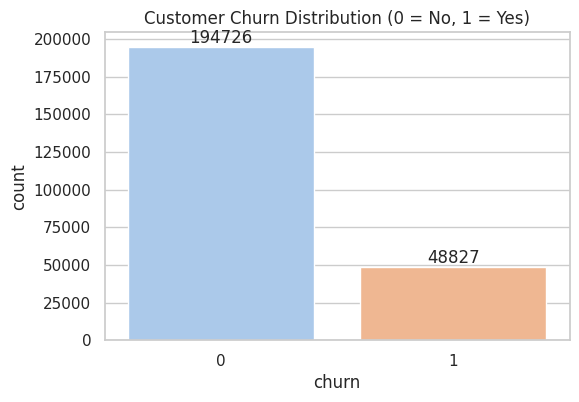

In [ ]:
# ---------------------------------------
#  Target (Churn) Overview
# ---------------------------------------
churn_counts = df["churn"].value_counts(dropna=False)
churn_pct = df["churn"].value_counts(normalize=True, dropna=False) * 100
churn_df = pd.concat([churn_counts.rename("count"), churn_pct.rename("percent")], axis=1)
print("\n--- Target Distribution: Churn ---")
display(churn_df)

plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x="churn", hue="churn", palette="pastel", legend=False)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Customer Churn Distribution (0 = No, 1 = Yes)")
plt.show()

In [ ]:

# Define categorical and numerical variables
cat_cols = ["telecom_partner", "gender", "state", "city"]
num_cols = ["age", "num_dependents", "estimated_salary", "calls_made", "sms_sent", "data_used"]


# **Categorical Feature Churn Distribution Analysis**



*   Understand Relationships Between Categories and Churn
*   Visualize Data Patterns


*   Highlight Imbalances
*   Inform Feature Engineering & Modeling

We are visually exploring how churn behaves across
categorical variables to uncover patterns that can help explain customer attrition and guide model building





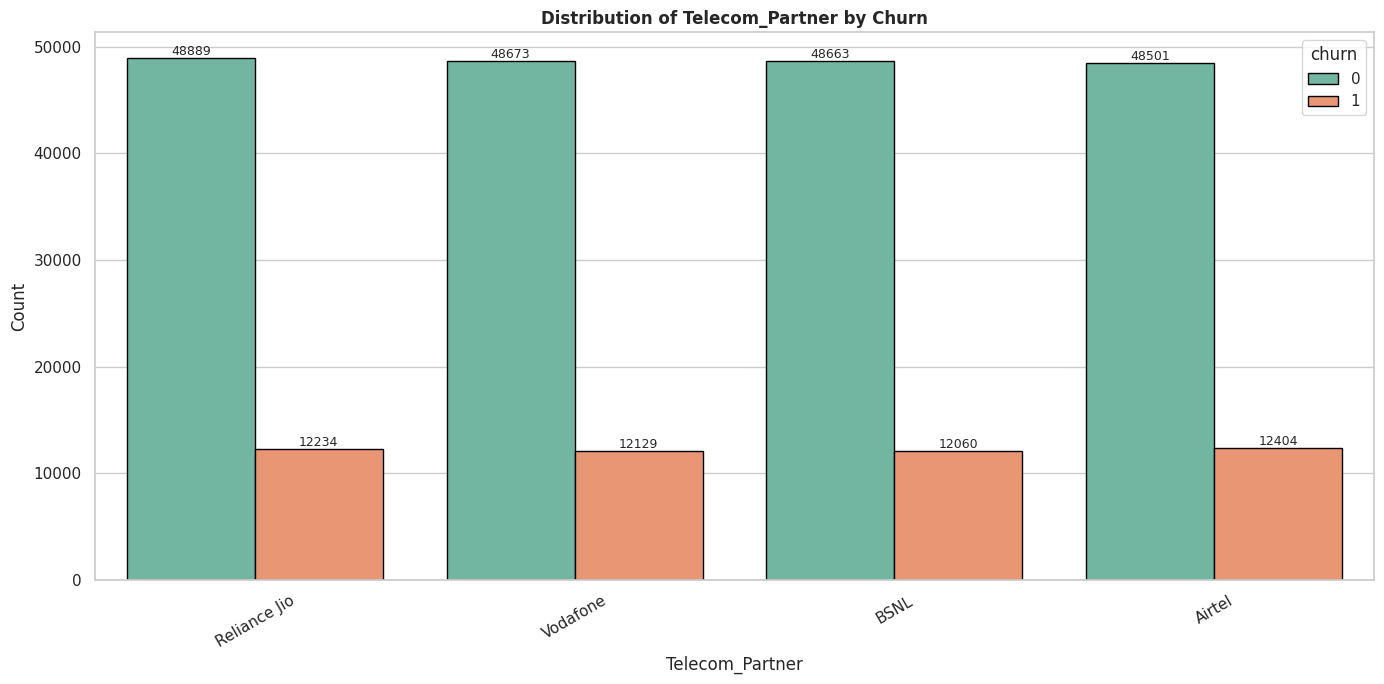

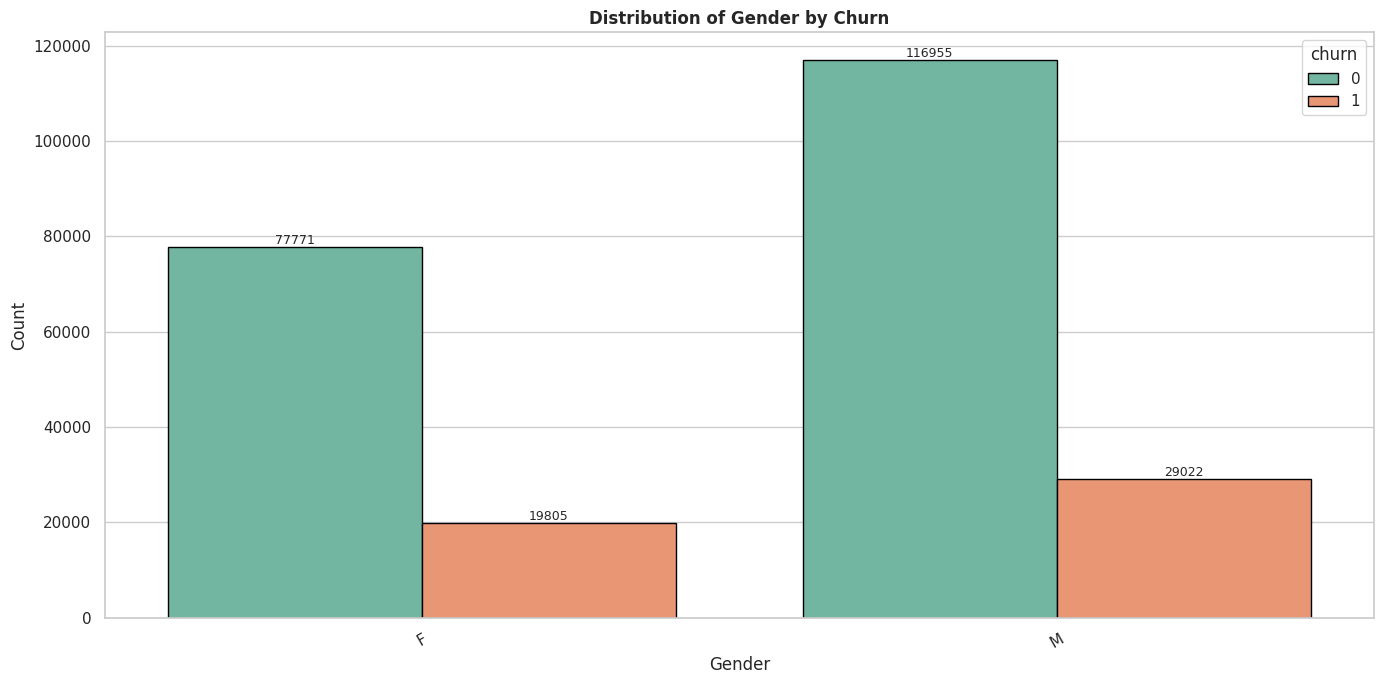

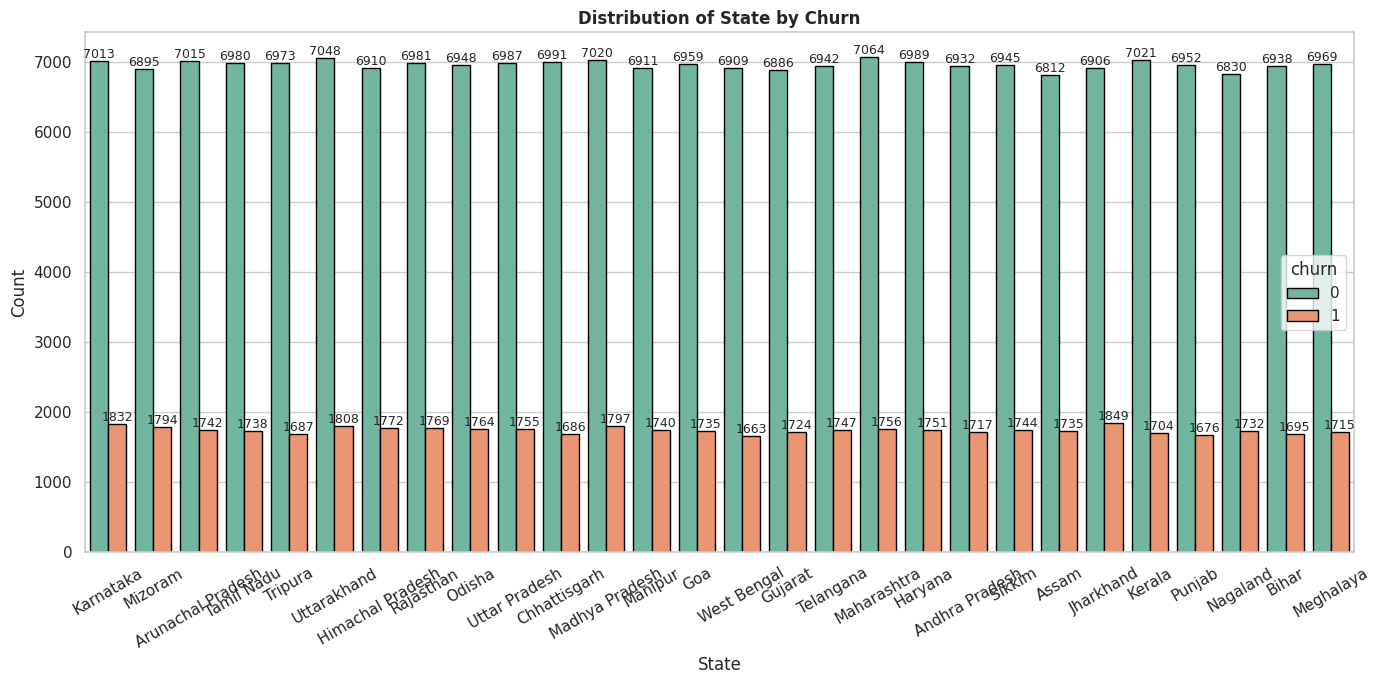

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot churn distribution for categorical columns
def countplot_with_churn(col, df, hue="churn", palette="Set2", figsize=(7, 4), percent=True):
    """
    Creates a countplot for a categorical column with churn distribution.
    Parameters:
        col: column name
        df: DataFrame
        hue: column for hue (default = 'churn')
        palette: color palette
        figsize: figure size
        percent: whether to show percentages on bars
    """
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=df, x=col, hue=hue, palette=palette, edgecolor='black')

    plt.title(f"Distribution of {col.title()} by Churn", fontsize=12, fontweight="bold")
    plt.xlabel(col.title())
    plt.ylabel("Count")
    plt.xticks(rotation=30)

    # Add labels (counts or percentages)
    total = len(df)
    for container in ax.containers:
        if percent:
            labels = [f"{(bar.get_height() / total * 100):.1f}%" if bar.get_height() > 0 else "" for bar in container]
        else:
            labels = [str(int(bar.get_height())) if bar.get_height() > 0 else "" for bar in container]
        ax.bar_label(container, labels=labels, label_type="edge", fontsize=9)

    plt.tight_layout()
    plt.show()



# --- Example 2: Churn distribution by categorical variables ---
cat_vars = ["telecom_partner", "gender", "state"]

for col in cat_vars:
    if col in df.columns:
        countplot_with_churn(col, df, figsize=(14, 7), percent=False)


# **🔍 Research Question 1:**

**What demographic and socioeconomic factors are associated with customer churn in the telecom sector?**

**Purpose:**
To explore how attributes such as age, gender and state influence the likelihood of churn.

In [ ]:
# ---------------------------------------------------------------
# 🔍 Churn Analysis by Age Group, Gender, and State
# ---------------------------------------------------------------

# ✅ Step 1: Create Age Groups
bins = [0, 19, 29, 39, 49, 59, 200]
labels = ['<20', '20–29', '30–39', '40–49', '50–59', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# ✅ Step 2: Group by state, gender, and age_group
# Calculate both total customers and churned customers
churn_age_gender_state = (
    df.groupby(['state', 'gender', 'age_group'] , observed=False)
      .agg(
          total_customers=('customer_id', 'count'),
          churned_customers=('churn', 'sum')
      )
      .reset_index()
)

# ✅ Step 3: Calculate churn rate for reference (optional)
churn_age_gender_state['churn_rate'] = (
    churn_age_gender_state['churned_customers'] / churn_age_gender_state['total_customers']
)

display(churn_age_gender_state.head(10))



state gender age_group  total_customers  churned_customers  \
0  Andhra Pradesh      F       <20               51                  9   
1  Andhra Pradesh      F     20–29              616                136   
2  Andhra Pradesh      F     30–39              582                120   
3  Andhra Pradesh      F     40–49              587                127   
4  Andhra Pradesh      F     50–59              604                110   
5  Andhra Pradesh      F       60+             1025                217   
6  Andhra Pradesh      M       <20               94                 19   
7  Andhra Pradesh      M     20–29              921                162   
8  Andhra Pradesh      M     30–39              884                165   
9  Andhra Pradesh      M     40–49              901                158   

   churn_rate  
0    0.176471  
1    0.220779  
2    0.206186  
3    0.216354  
4    0.182119  
5    0.211707  
6    0.202128  
7    0.175896  
8    0.186652  
9    0.175361

from matplotlib import pyplot as plt
_df_0['total_customers'].plot(kind='hist', bins=20, title='total_customers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['churned_customers'].plot(kind='hist', bins=20, title='churned_customers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['churn_rate'].plot(kind='hist', bins=20, title='churn_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='total_customers', y='churned_customers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='churned_customers', y='churn_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['total_customers'].plot(kind='line', figsize=(8, 4), title='total_customers')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['churned_customers'].plot(kind='line', figsize=(8, 4), title='churned_customers')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['churn_rate'].plot(kind='line', figsize=(8, 4), title='churn_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='total_customers', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='churned_customers', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['gender'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='churn_rate', y='gender', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

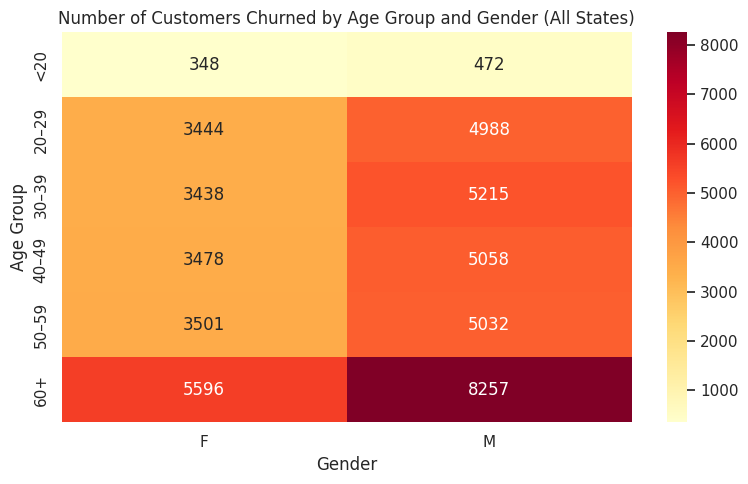

In [ ]:
# ✅ Step 4: Heatmap — show number of churned customers
plt.figure(figsize=(8, 5))
pivot_counts = churn_age_gender_state.pivot_table(
    index='age_group', columns='gender', values='churned_customers', aggfunc='sum', observed=False
)
sns.heatmap(pivot_counts, annot=True, fmt=".0f", cmap='YlOrRd')
plt.title("Number of Customers Churned by Age Group and Gender (All States)")
plt.ylabel("Age Group")
plt.xlabel("Gender")
plt.tight_layout()
plt.show()

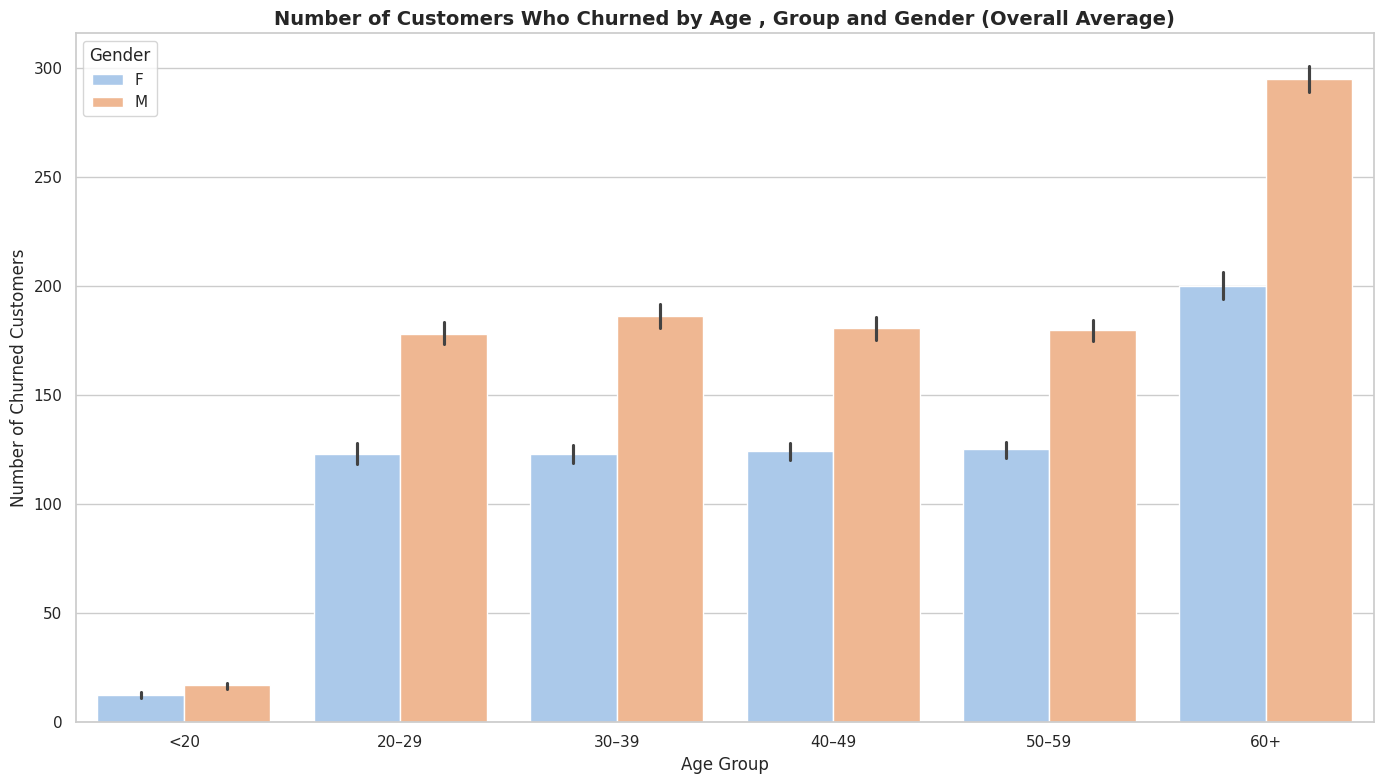

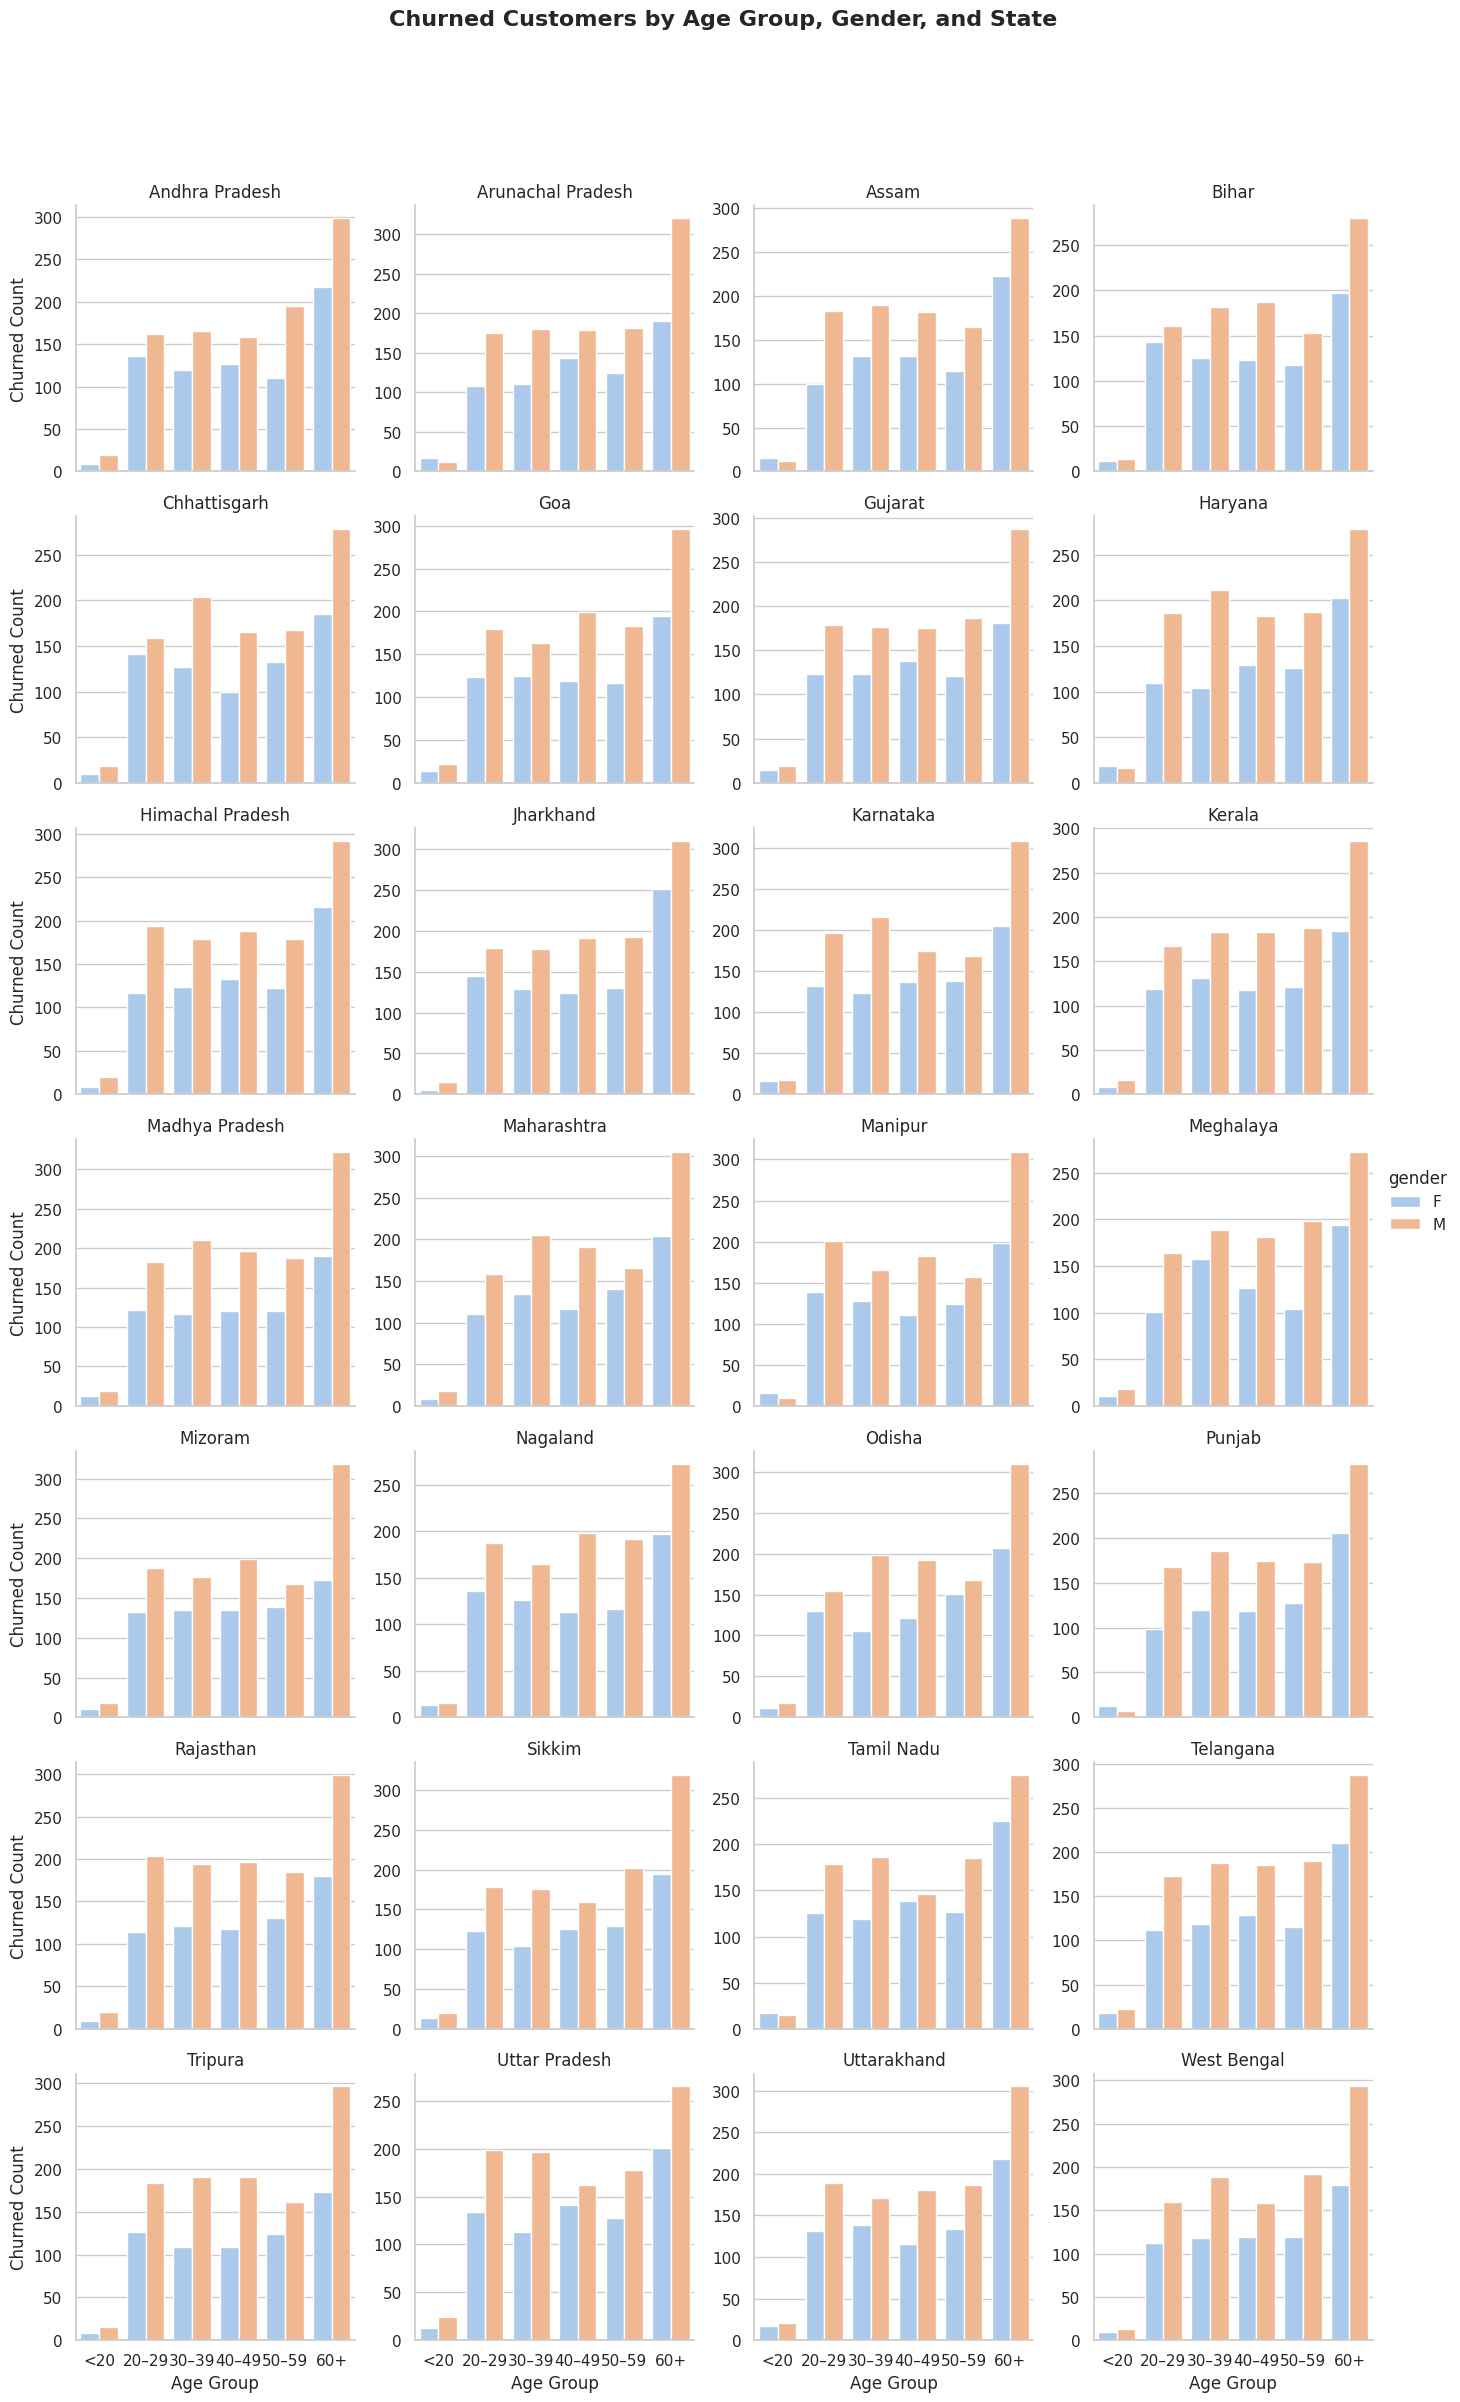

In [ ]:
# ✅ Step 5: Bar chart — total churned customers (across all states)
plt.figure(figsize=(14, 8))
sns.barplot(
    data=churn_age_gender_state,
    x='age_group', y='churned_customers', hue='gender', palette='pastel'
)
plt.title("Number of Customers Who Churned by Age , Group and Gender (Overall Average)", fontsize=14, fontweight="bold")
plt.ylabel("Number of Churned Customers")
plt.xlabel("Age Group")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

sns.catplot(
    data=churn_age_gender_state,
    x="age_group", y="churned_customers",
    hue="gender",
    col="state",
    kind="bar",
    col_wrap=4,
    height=3.5,
    palette="pastel",
    sharey=False
).set_titles("{col_name}").set_axis_labels("Age Group", "Churned Count")

plt.subplots_adjust(top=0.9)
plt.suptitle("Churned Customers by Age Group, Gender, and State", fontsize=16, fontweight="bold")
plt.show()

In [ ]:
# ✅ Step 7: Identify top churn segments (highest churn count per state)
top_segments = (
    churn_age_gender_state.sort_values(['state', 'churned_customers'], ascending=[True, False])
    .groupby('state')
    .first()
    .reset_index()
)
print("\n🏆 Highest-Churning Segment per State (By Number of Customers):")
display(top_segments)


🏆 Highest-Churning Segment per State (By Number of Customers):


state gender age_group  total_customers  churned_customers  \
0      Andhra Pradesh      M       60+             1491                299   
1   Arunachal Pradesh      M       60+             1498                321   
2               Assam      M       60+             1421                289   
3               Bihar      M       60+             1404                280   
4        Chhattisgarh      M       60+             1475                278   
5                 Goa      M       60+             1450                296   
6             Gujarat      M       60+             1457                287   
7             Haryana      M       60+             1452                278   
8    Himachal Pradesh      M       60+             1484                292   
9           Jharkhand      M       60+             1464                310   
10          Karnataka      M       60+             1511                309   
11             Kerala      M       60+             1459                286   
12     Madhya Pradesh      M       60+             1579                322   
13        Maharashtra      M       60+             1484                305   
14            Manipur      M       60+             1483                309   
15          Meghalaya      M       60+             1452                272   
16            Mizoram      M       60+             1476                319   
17           Nagaland      M       60+             1389                273   
18             Odisha      M       60+             1487                310   
19             Punjab      M       60+             1479                283   
20          Rajasthan      M       60+             1480                299   
21             Sikkim      M       60+             1472                319   
22         Tamil Nadu      M       60+             1511                275   
23          Telangana      M       60+             1452                287   
24            Tripura      M       60+             1523                296   
25      Uttar Pradesh      M       60+             1446                265   
26        Uttarakhand      M       60+             1489                305   
27        West Bengal      M       60+             1474                293   

    churn_rate  
0     0.200537  
1     0.214286  
2     0.203378  
3     0.199430  
4     0.188475  
5     0.204138  
6     0.196980  
7     0.191460  
8     0.196765  
9     0.211749  
10    0.204500  
11    0.196025  
12    0.203927  
13    0.205526  
14    0.208361  
15    0.187328  
16    0.216125  
17    0.196544  
18    0.208473  
19    0.191346  
20    0.202027  
21    0.216712  
22    0.181999  
23    0.197658  
24    0.194353  
25    0.183264  
26    0.204835  
27    0.198779

# **📊 Research Question 2:**

**How do usage behaviors — including calls made, SMS sent, and data used — differ between churned customers?**

**Purpose:**
To identify patterns in communication and data usage that distinguish churned customers from those who remain.

Total number of churned customers: 48827

Number of churned customers by telecom partner:
telecom_partner
Airtel          12404
Reliance Jio    12234
Vodafone        12129
BSNL            12060
Name: count, dtype: int64


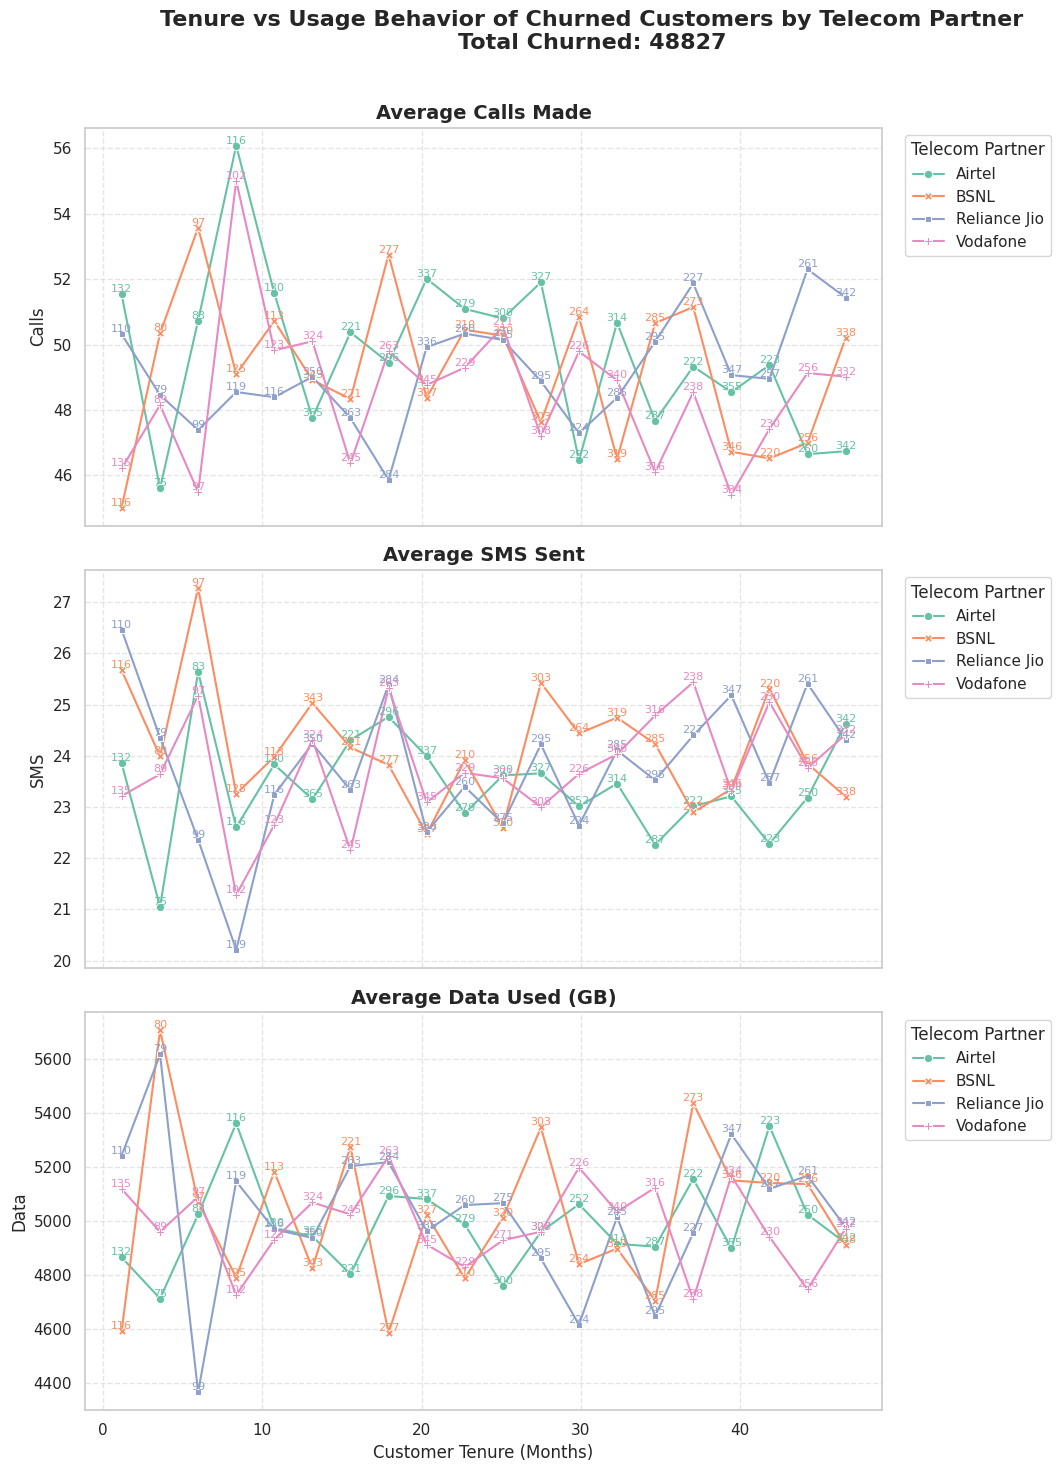

📌 High-Risk Churn Customer Summary by Tenure Bin:
        tenure_bin  avg_calls    avg_sms     avg_data  customer_count
0  (-0.0478, 4.78]  37.715812  19.794872  4206.316239             468
1     (4.78, 9.56]  42.674134  18.509165  3938.183299             491
2    (9.56, 14.34]  40.036771  19.459193  4136.152466            1115
3   (14.34, 19.12]  39.432365  19.482158  4192.559336            1205
4    (19.12, 23.9]  40.524963  18.859031  4071.073421            1362
5    (23.9, 28.68]  41.198718  18.900997  4099.106125            1404
6   (28.68, 33.46]  39.690604  19.416348  4036.253629            1309
7   (33.46, 38.24]  40.753135  19.155172  4089.456897            1276
8   (38.24, 43.02]  38.275480  19.333826  4266.799114            1354
9    (43.02, 47.8]  39.914244  19.295058  4043.164971            1376


/tmp/ipython-input-1874024364.py:104: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [ ]:
# ---------------------------------------------------------------
# 📈 Tenure vs Usage Behavior Line Graphs (Churn Customers Only) + Customer Counts
# ---------------------------------------------------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Ignore font warnings
warnings.filterwarnings("ignore", message="Glyph.*missing from font")

# ------------------------------
# Sample data setup (if needed)
# ------------------------------
# df = pd.read_csv("your_data.csv")

# Ensure date is datetime and tenure is calculated
df["date_of_registration"] = pd.to_datetime(df["date_of_registration"], errors="coerce")
latest_date = df["date_of_registration"].max()
df["tenure_months"] = ((latest_date - df["date_of_registration"]).dt.days / 30).round(1)

# Filter only churned customers
df_churn = df[df["churn"] == 1].copy()
df_churn["churn_label"] = "Churn"  # All values are churn

# Total number of churned customers
total_churned = len(df_churn)
print(f"Total number of churned customers: {total_churned}")

# Number of churned customers per telecom partner
partner_counts = df_churn['telecom_partner'].value_counts()
print("\nNumber of churned customers by telecom partner:")
print(partner_counts)

# Smooth average over tenure groups (optional binning for clarity)
df_churn["tenure_bin"] = pd.cut(df_churn["tenure_months"], bins=20)
tenure_summary = (
    df_churn.groupby(["tenure_bin", "telecom_partner"], observed=False)
            .agg(
                avg_calls=('calls_made', 'mean'),
                avg_sms=('sms_sent', 'mean'),
                avg_data=('data_used', 'mean'),
                customer_count=('calls_made', 'count')  # Count of customers in each bin
            )
            .reset_index()
)

# Convert tenure_bin to midpoint values for x-axis
tenure_summary["tenure_mid"] = tenure_summary["tenure_bin"].apply(lambda x: x.mid)

# ------------------------------
# Plot settings
# ------------------------------
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

metrics = ["avg_calls", "avg_sms", "avg_data"]
titles = ["Average Calls Made", "Average SMS Sent", "Average Data Used (GB)"]

for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.lineplot(
        data=tenure_summary,
        x="tenure_mid",
        y=metric,
        hue="telecom_partner",
        style="telecom_partner",
        markers=True,
        dashes=False,
        ax=ax,
        palette="Set2"
    )
    ax.set_title(titles[i], fontsize=14, fontweight="bold")
    ax.set_xlabel("Customer Tenure (Months)", fontsize=12)
    ax.set_ylabel(titles[i].split(" ")[1], fontsize=12)
    ax.legend(title="Telecom Partner", bbox_to_anchor=(1.02, 1), loc="upper left")
    ax.grid(True, linestyle="--", alpha=0.5)

    # Annotate number of customers per point
    for line in ax.get_lines():
        telecom = line.get_label()
        partner_data = tenure_summary[tenure_summary["telecom_partner"] == telecom]
        for x, y, count in zip(partner_data["tenure_mid"], partner_data[metric], partner_data["customer_count"]):
            ax.text(x, y, int(count), fontsize=8, color=line.get_color(), ha='center', va='bottom')

# Add a main title
plt.suptitle(f"Tenure vs Usage Behavior of Churned Customers by Telecom Partner\nTotal Churned: {total_churned}",
             fontsize=16, fontweight="bold")

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 0.97])

# Show the figure
plt.show()


# Filter churned customers
df_churn = df[df["churn"] == 1].copy()

# Calculate average usage metrics per tenure bin
df_churn["tenure_bin"] = pd.cut(df_churn["tenure_months"], bins=10)
usage_summary = (
    df_churn.groupby("tenure_bin")
            .agg(
                avg_calls=('calls_made', 'mean'),
                avg_sms=('sms_sent', 'mean'),
                avg_data=('data_used', 'mean'),
                customer_count=('calls_made', 'count')
            )
            .reset_index()
)



# ---------------------------------------------------------------
# 📊 Summary of High-Risk Churn Customer Usage (Warning-Free)
# ---------------------------------------------------------------

# Define thresholds for high churn risk (bottom 25% usage)
low_calls_threshold = df_churn['calls_made'].quantile(0.25)
low_sms_threshold = df_churn['sms_sent'].quantile(0.25)
low_data_threshold = df_churn['data_used'].quantile(0.25)

# Filter high-risk churn customers and make a copy to avoid SettingWithCopyWarning
high_risk_customers = df_churn[
    (df_churn['calls_made'] <= low_calls_threshold) |
    (df_churn['sms_sent'] <= low_sms_threshold) |
    (df_churn['data_used'] <= low_data_threshold)
].copy()  # <-- .copy() added

# Create tenure bins safely using .loc
high_risk_customers.loc[:, 'tenure_bin'] = pd.cut(high_risk_customers['tenure_months'], bins=10)

# Aggregate average usage per tenure bin, observed=True to avoid FutureWarning
high_risk_summary = high_risk_customers.groupby('tenure_bin', observed=True).agg(
    avg_calls=('calls_made', 'mean'),
    avg_sms=('sms_sent', 'mean'),
    avg_data=('data_used', 'mean'),
    customer_count=('calls_made', 'count')
).reset_index()

print("📌 High-Risk Churn Customer Summary by Tenure Bin:")
print(high_risk_summary)




# **📈 Research Question 3:**

**Which states show the highest churn for each telecom partner over time, and how does customer churn vary across different regions and years?**

**Purpose: **


*   To identify regional patterns in customer churn across India.

*   To compare telecom partners and determine if certain partners experience higher churn in specific states.

*   To observe temporal trends, i.e., whether churn is increasing or decreasing year over year in different regions.
*   To provide actionable insights for telecom companies to target high-churn states with retention strategies.











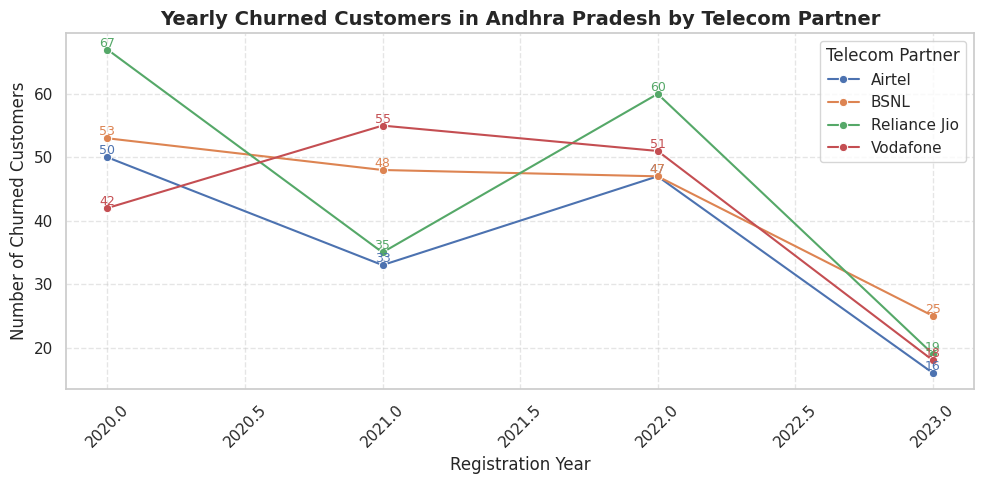

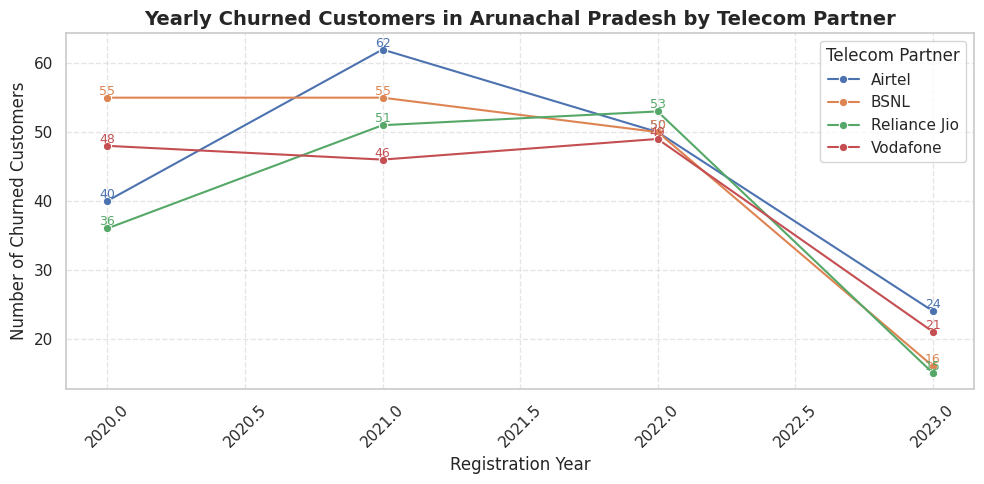

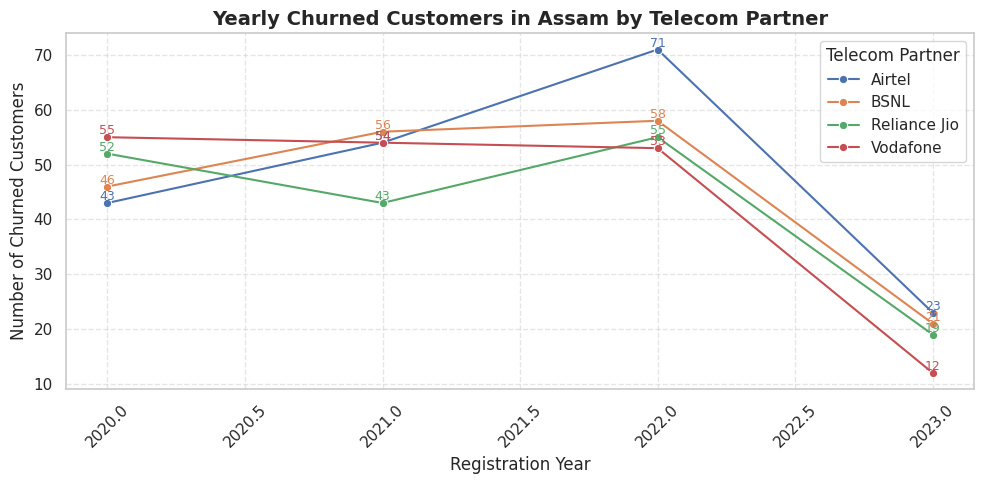

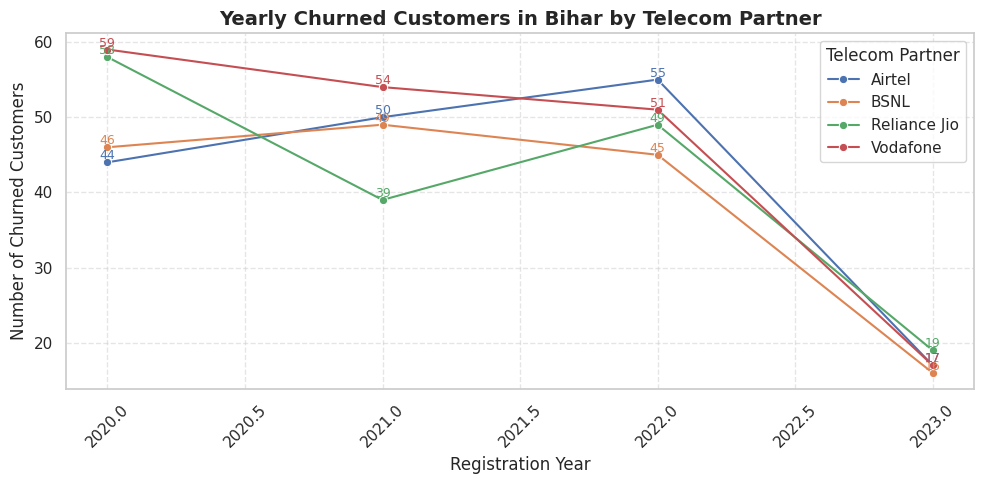

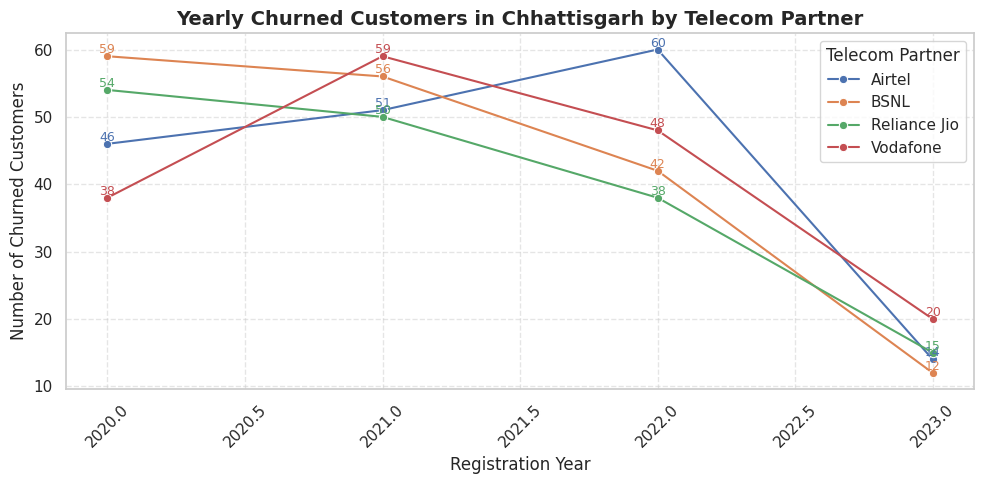

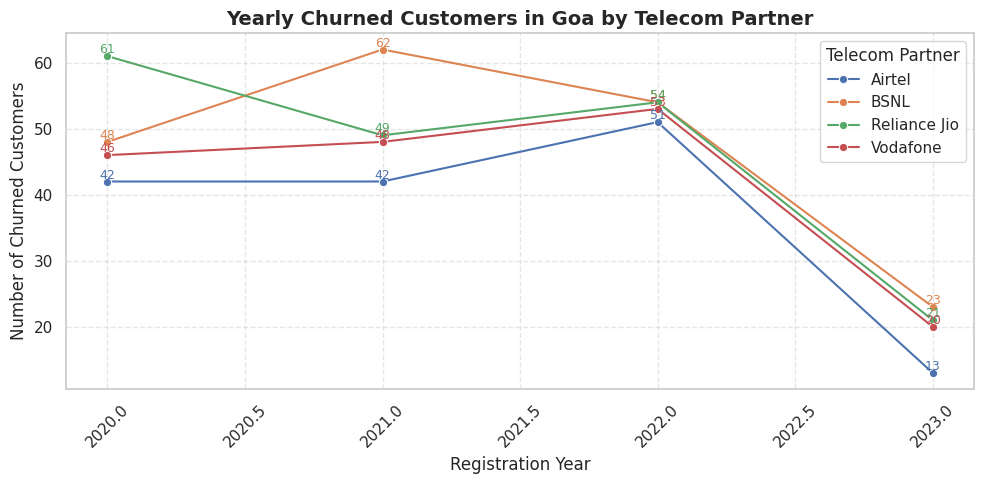

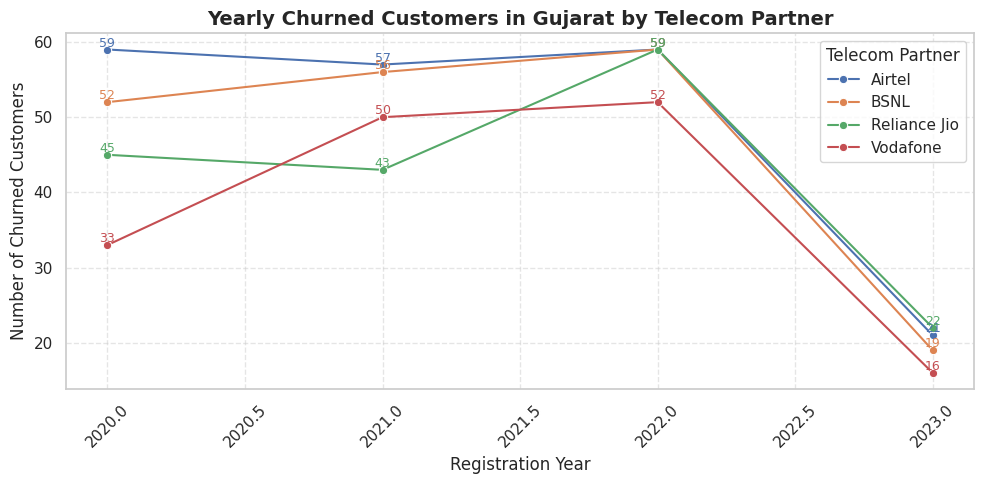

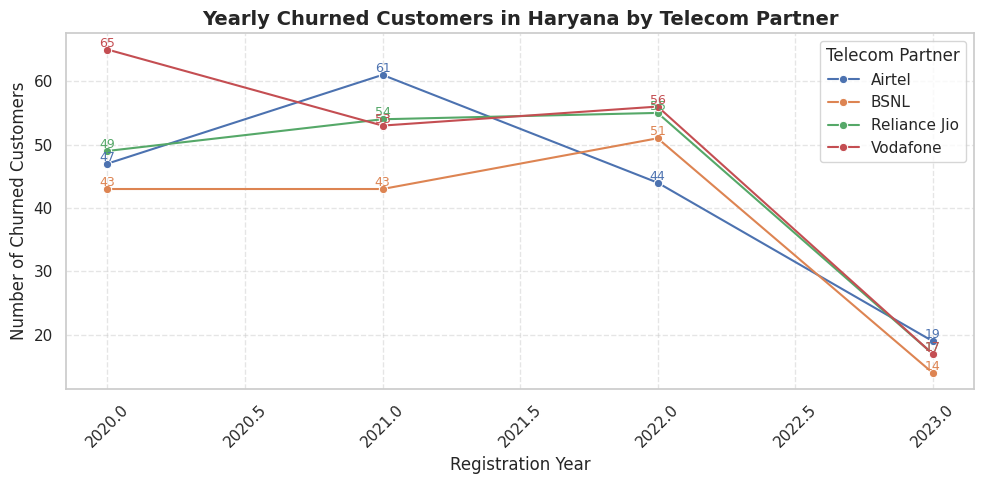

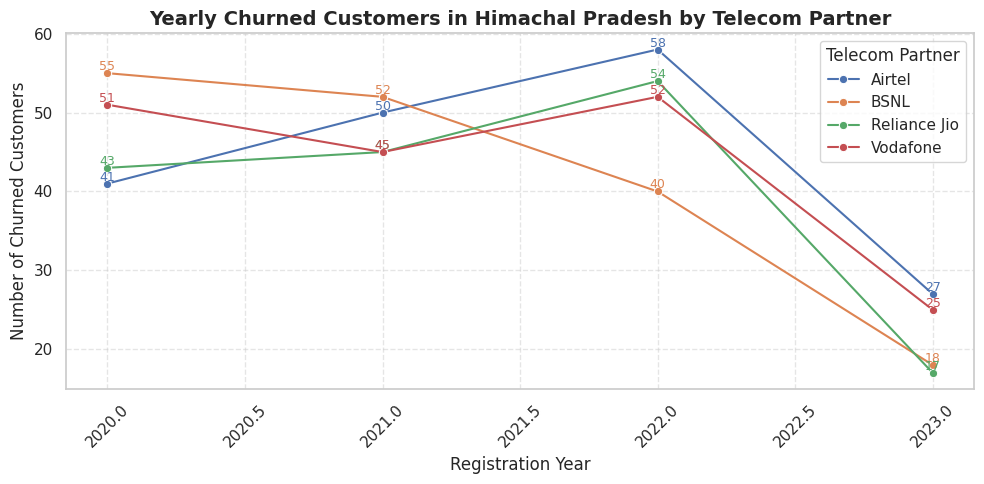

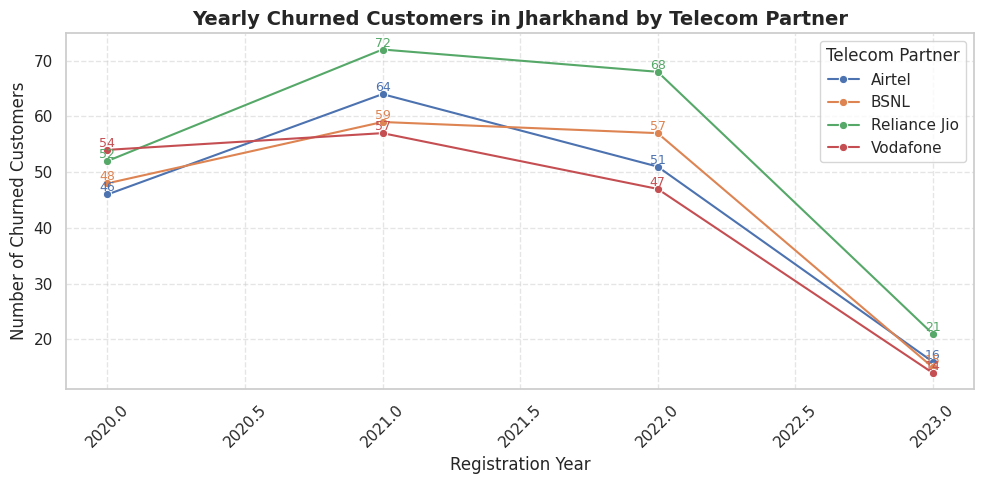

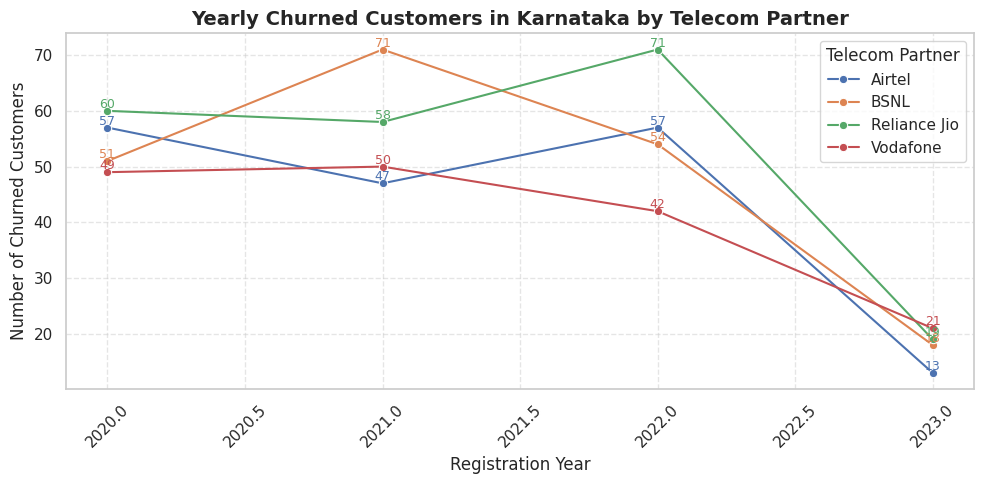

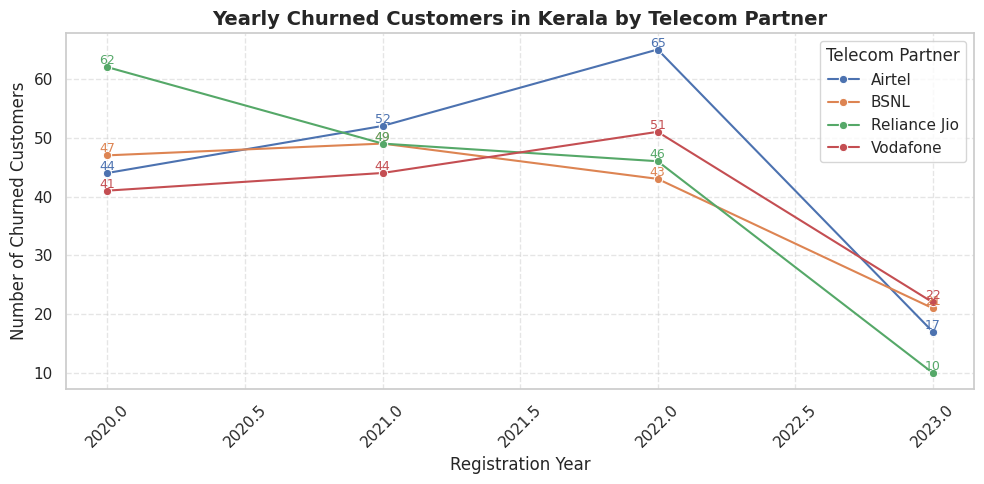

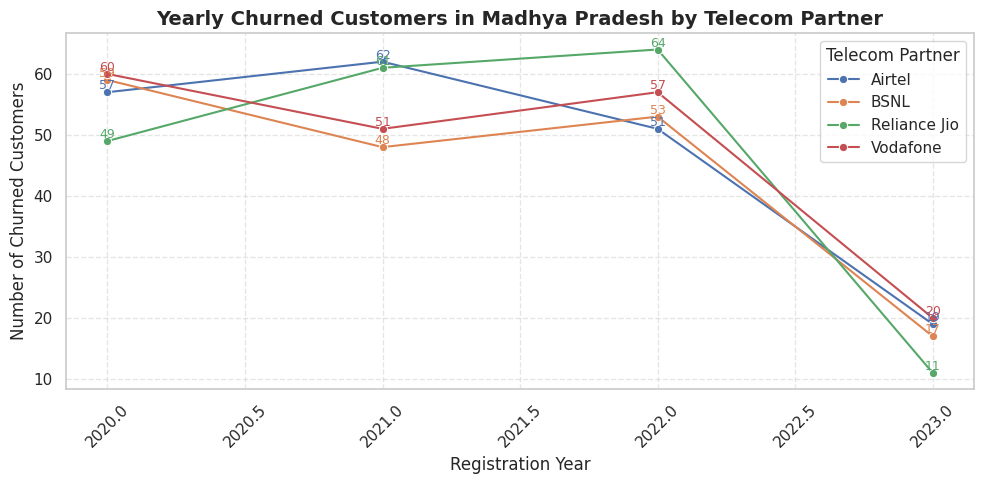

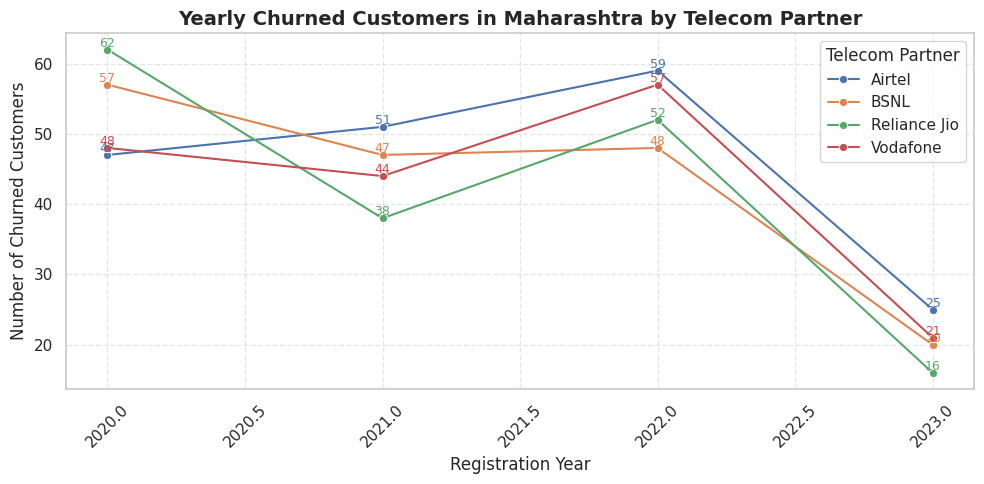

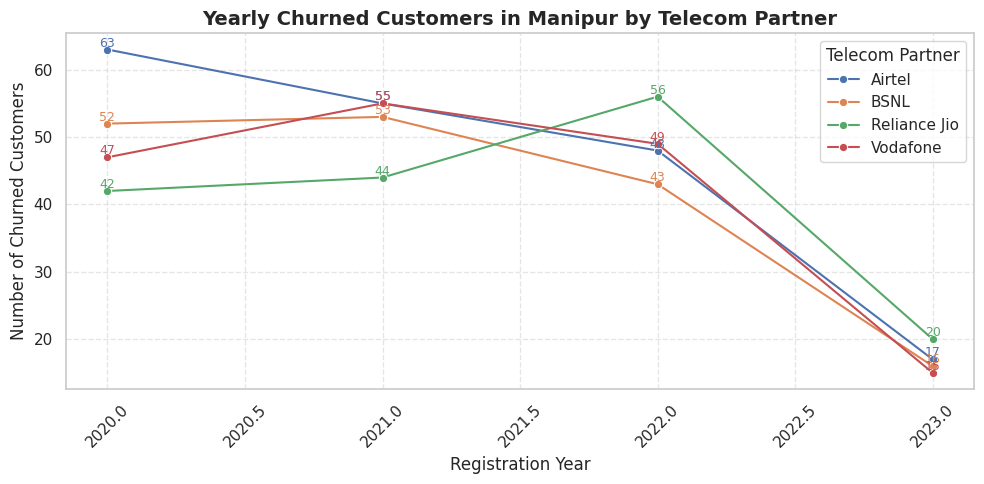

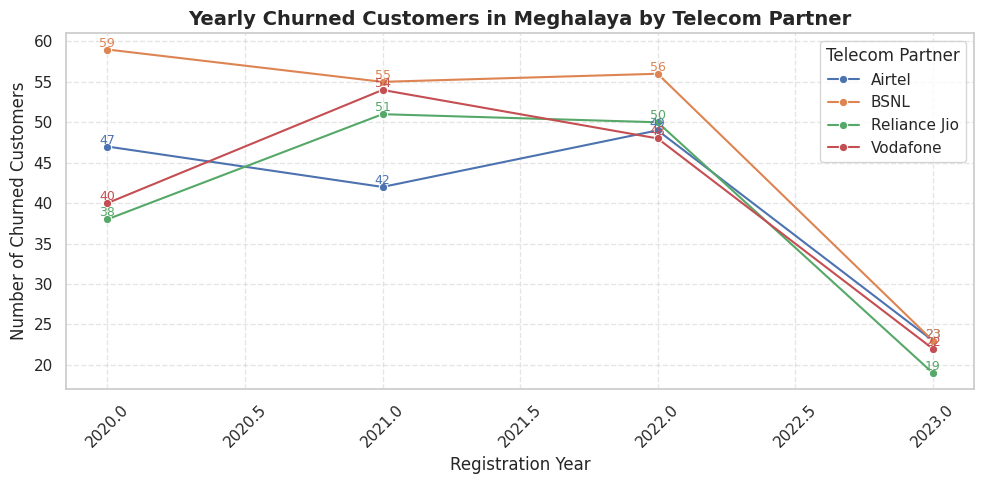

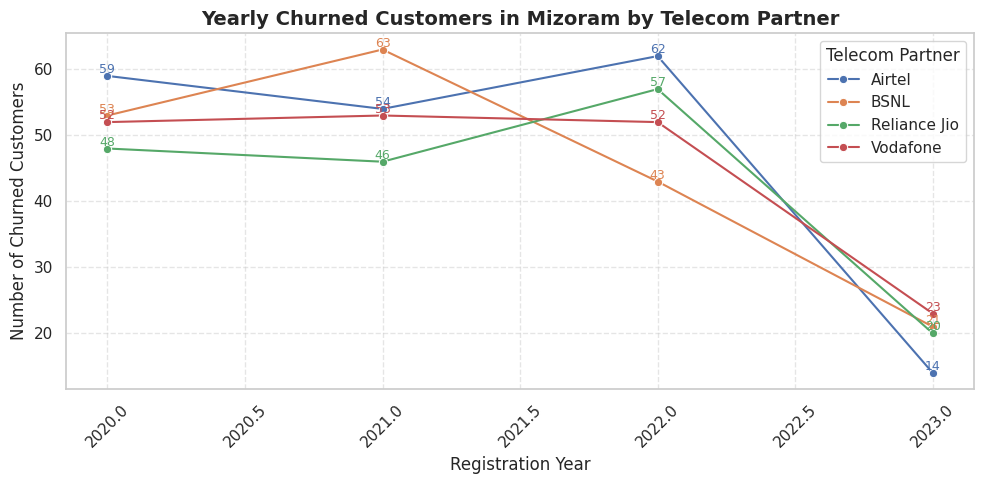

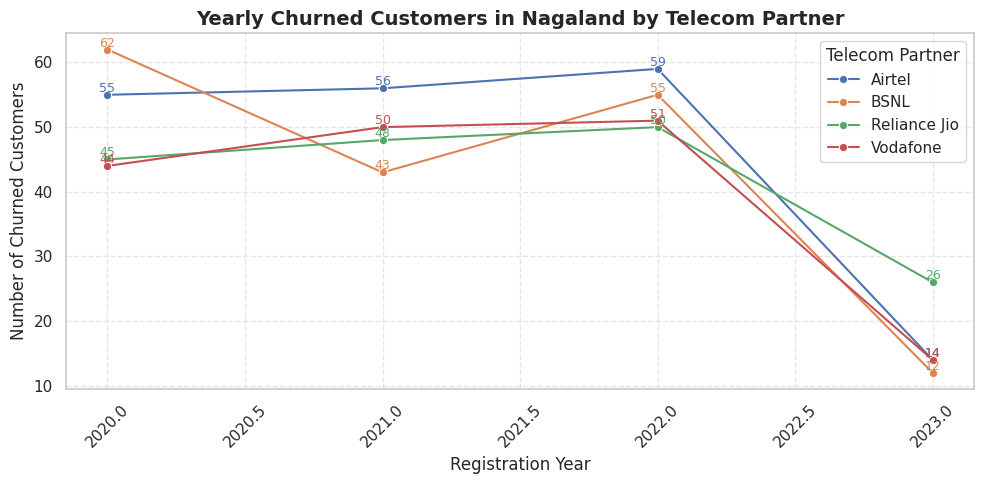

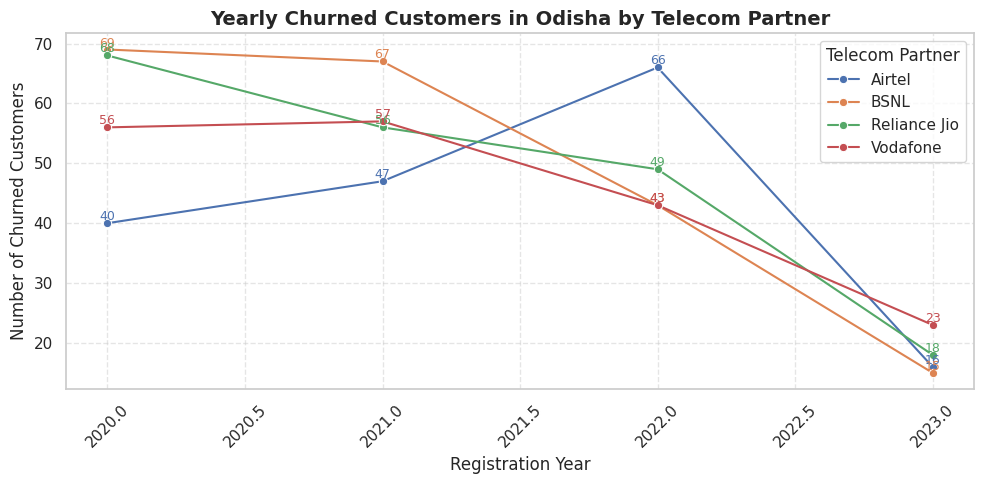

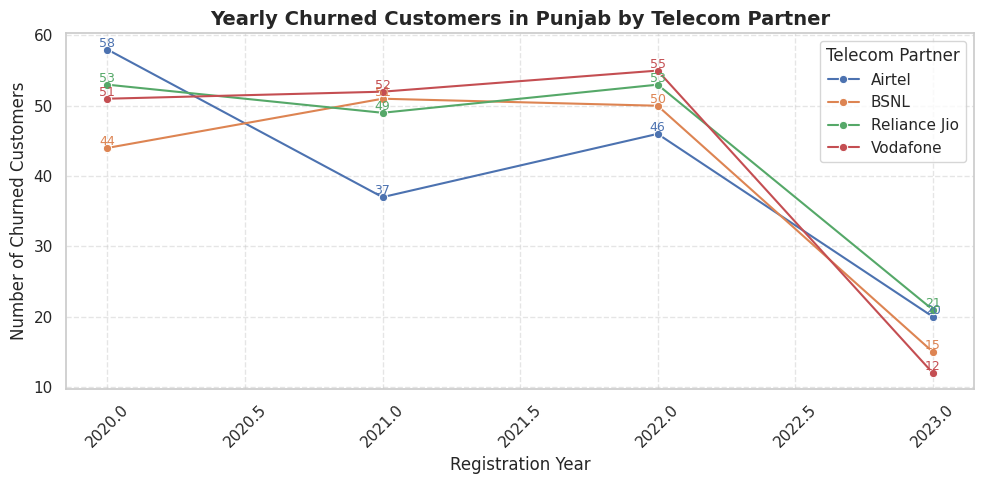

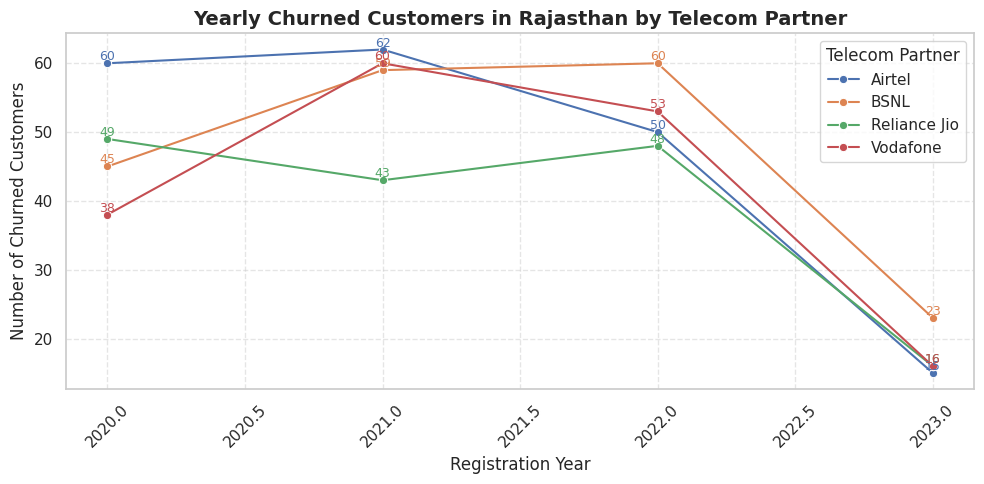

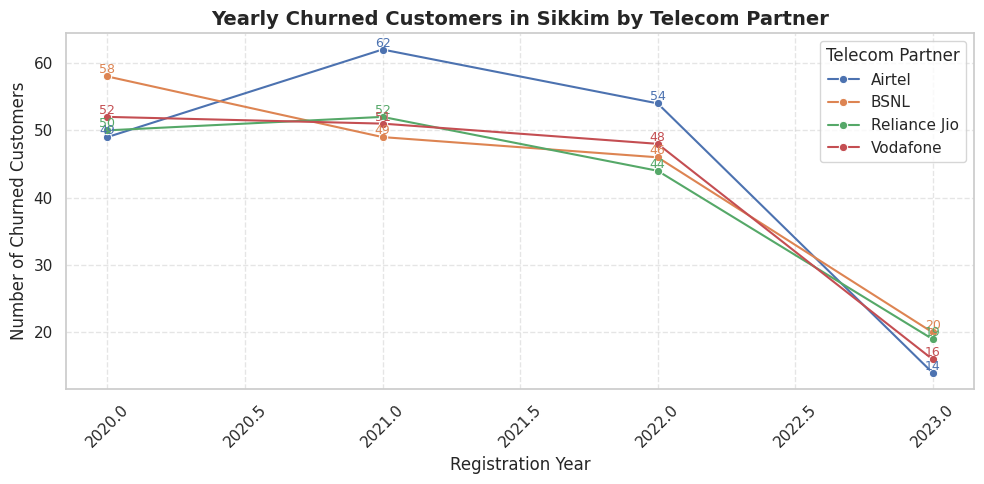

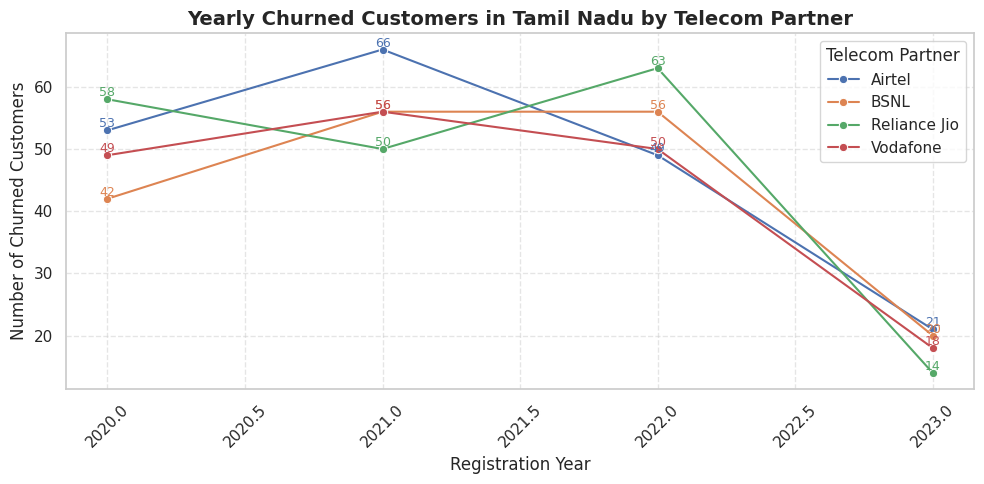

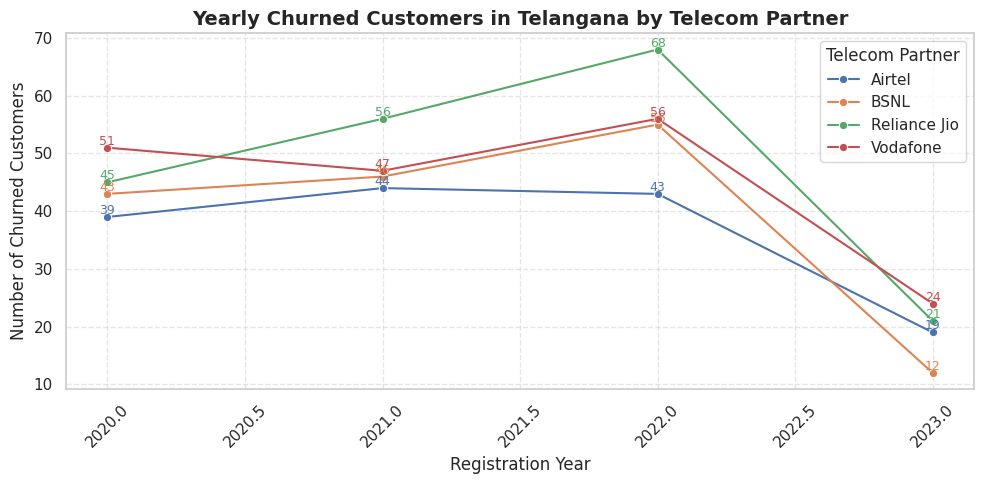

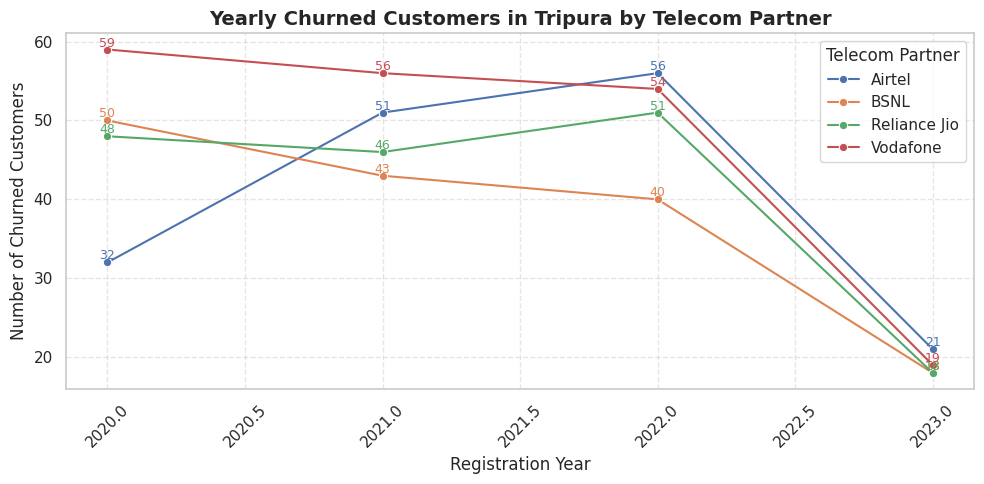

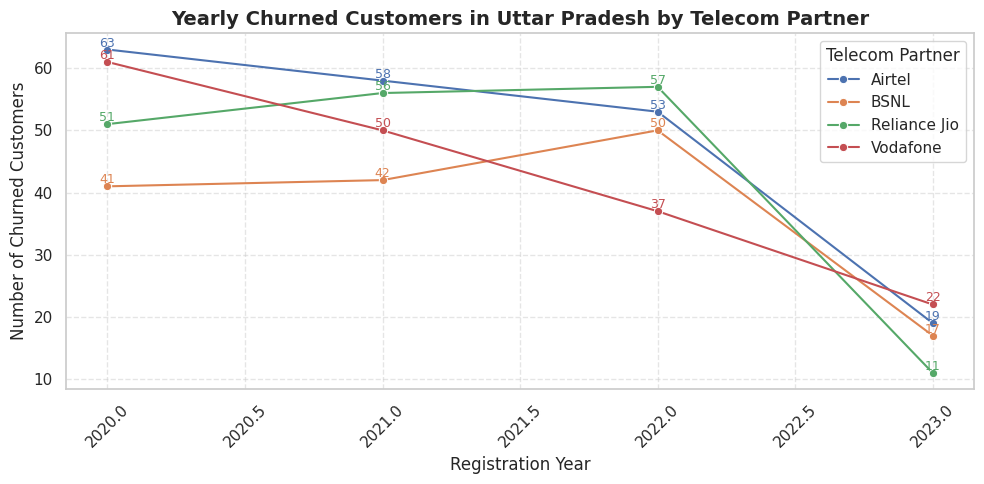

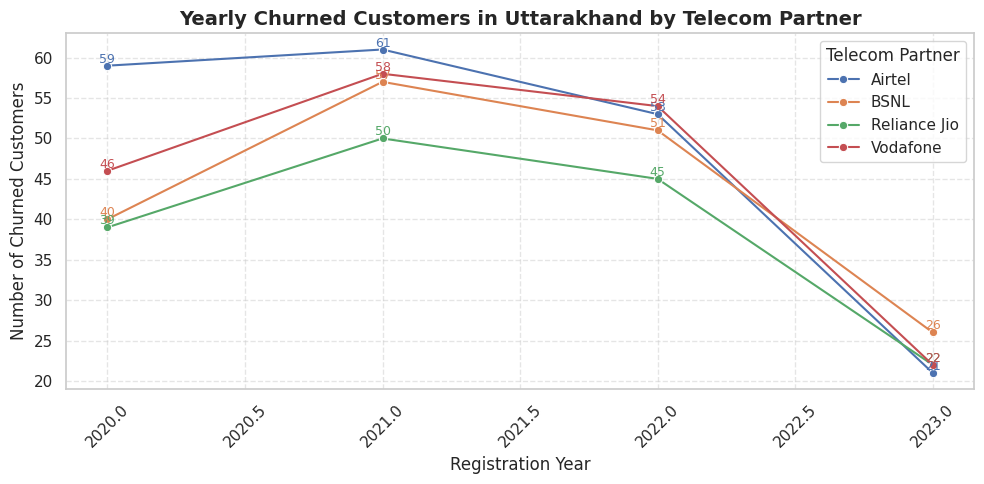

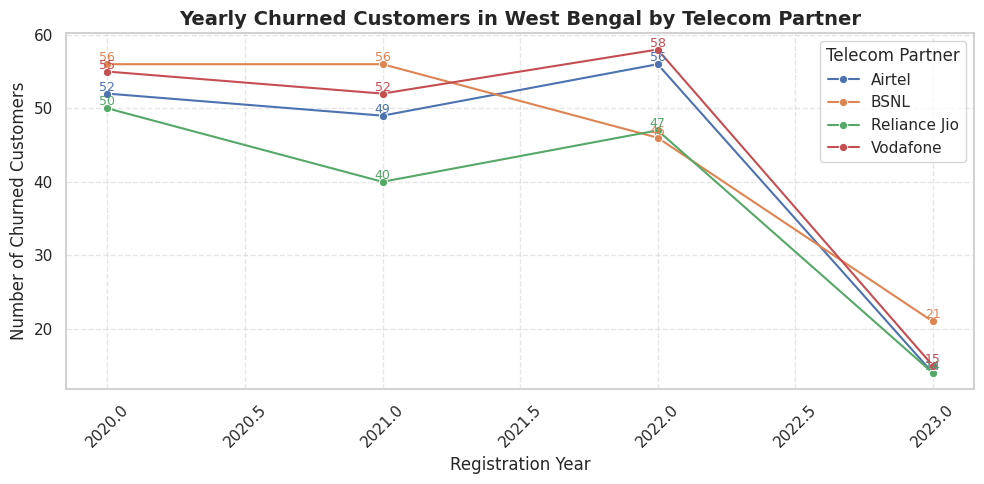

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure date is datetime
df['date_of_registration'] = pd.to_datetime(df['date_of_registration'], errors='coerce')

# Extract registration year
df['registration_year'] = df['date_of_registration'].dt.year

# Filter churned customers only
df_churn = df[df['churn'] == 1].copy()

# Group by year, state, and telecom partner
state_partner_yearly_churn = (
    df_churn.groupby(['registration_year', 'state', 'telecom_partner'], observed=True)
            .size()
            .reset_index(name='churned_customers')
)

# Get list of all states
all_states = state_partner_yearly_churn['state'].unique()

# Loop through each state and plot with annotations
for state in all_states:
    df_state = state_partner_yearly_churn[state_partner_yearly_churn['state'] == state]

    plt.figure(figsize=(10,5))
    ax = sns.lineplot(
        data=df_state,
        x='registration_year',
        y='churned_customers',
        hue='telecom_partner',
        marker='o'
    )

    # Annotate each point with the number of customers
    for line in ax.get_lines():
        telecom = line.get_label()
        partner_data = df_state[df_state['telecom_partner'] == telecom]
        for x, y in zip(partner_data['registration_year'], partner_data['churned_customers']):
            ax.text(x, y, int(y), fontsize=9, color=line.get_color(), ha='center', va='bottom')

    plt.title(f"Yearly Churned Customers in {state} by Telecom Partner", fontsize=14, fontweight='bold')
    plt.xlabel("Registration Year", fontsize=12)
    plt.ylabel("Number of Churned Customers", fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Telecom Partner')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()
